In [70]:
import pandas as pd
import urllib # sirve para acceder a archivos de internet y descargarlos automaticamnete
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [71]:
# os me sirve para crear la ruta de los directorios, donde quiero descargar mi archivo
file_path = os.path.join("data", "covid") #nombro las carpetas

In [72]:
os.makedirs(file_path, exist_ok = True) #creacion de las carpetas

In [73]:
csv_path = os.path.join(file_path, 'data.csv') #decirle que guarde el nombre del archivo en la carpeta

In [74]:
#urllib.request.urlretrieve('https://covid19.who.int/WHO-COVID-19-global-data.csv', csv_path) # descarga el archivo desde este link de internet

In [75]:
df = pd.read_csv(csv_path)

### Dataset Covid Original

In [76]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132374 entries, 0 to 132373
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      132374 non-null  object
 1   Country_code       131813 non-null  object
 2   Country            132374 non-null  object
 3   WHO_region         132374 non-null  object
 4   New_cases          132374 non-null  int64 
 5   Cumulative_cases   132374 non-null  int64 
 6   New_deaths         132374 non-null  int64 
 7   Cumulative_deaths  132374 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.1+ MB


In [78]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,132374.000000,1.323740e+05,132374.000000,132374.000000
mean,1425.173886,2.617811e+05,30.727462,6265.791198
std,9491.259691,1.621011e+06,170.698202,32600.827992
min,-32952.000000,0.000000e+00,-60.000000,0.000000
25%,0.000000,2.400000e+01,0.000000,0.000000
50%,9.000000,2.952000e+03,0.000000,48.000000
75%,309.000000,5.576850e+04,5.000000,908.000000
max,414188.000000,3.364353e+07,6508.000000,603170.000000


### Cargando el dataset de Población solo los 20 paises principales que más usan el Bitcoin

In [79]:
popu = pd.read_csv("population_2020.csv")
popu2 = popu[["Country","Population"]]
popu3 = popu2.loc[popu2["Country"].isin(["United States of America","Russian Federation","Nigeria",
                                   "China","The United Kingdom","Colombia","Kenya","Canada",
                                   "India","Australia","Argentina","Peru","Philippines","Thailand",
                                   "Brazil","Chile","Mexico","Sweden","Ukraine","Malaysia"])]
popu3

,Country,Population
0,China,1440297825
1,India,1382345085
2,United States of America,331341050
5,Brazil,212821986
6,Nigeria,206984347
8,Russian Federation,145945524
9,Mexico,129166028
12,Philippines,109830324
19,Thailand,69830779
20,The United Kingdom,67948282


In [80]:
df2 = df[["Date_reported","Country","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths"]]
df2

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,0,0,0,0
1,2020-01-04,Afghanistan,0,0,0,0
2,2020-01-05,Afghanistan,0,0,0,0
3,2020-01-06,Afghanistan,0,0,0,0
4,2020-01-07,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
132369,2021-07-12,Zimbabwe,912,67765,59,2185
132370,2021-07-13,Zimbabwe,2661,70426,51,2236
132371,2021-07-14,Zimbabwe,2845,73271,38,2274
132372,2021-07-15,Zimbabwe,3110,76381,58,2332


In [81]:
df2.isnull().sum()

Date_reported        0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

### Seleccionado del dataset de Covid solo los 20 paises que más usan el Bitcoin

In [82]:
# https://www.statista.com/statistics/1195753/bitcoin-trading-selected-countries/
# https://triple-a.io/crypto-ownership/
#[Estados Unidos] [Rusia] [Nigeria] [China] [Reino Unido] [Colombia] 
#[Kenya] [Canada] [India] [Australia] [Argentina] [Peru] [Filipina] 
#[Tailandia] [Brazil] [Chile] [Mexico] [Suecia] [Ukrania] [Malasia] 
df3 = df2.loc[df2["Country"].isin(["United States of America","Russian Federation","Nigeria",
                                   "China","The United Kingdom","Colombia","Kenya","Canada",
                                   "India","Australia","Argentina","Peru","Philippines","Thailand",
                                   "Brazil","Chile","Mexico","Sweden","Ukraine","Malaysia"])]
df3 = df3.loc[df3["Cumulative_cases"]>0]
#df3["Country"].value_counts()

In [83]:
df3["Date_reported"] = pd.to_datetime(df3["Date_reported"])
#df3.info()
df3.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
4547,2020-03-03,Argentina,5,5,0,0
4548,2020-03-04,Argentina,0,5,0,0
4549,2020-03-05,Argentina,0,5,0,0
4550,2020-03-06,Argentina,1,6,0,0
4551,2020-03-07,Argentina,7,13,1,1


### Merge con el dataset de Covid y de Population

In [84]:
CovidDF = df3.merge(popu3)
CovidDF

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Population
0,2020-03-03,Argentina,5,5,0,0,45267449
1,2020-03-04,Argentina,0,5,0,0,45267449
2,2020-03-05,Argentina,0,5,0,0,45267449
3,2020-03-06,Argentina,1,6,0,0,45267449
4,2020-03-07,Argentina,7,13,1,1,45267449
...,...,...,...,...,...,...,...
10436,2021-07-12,United States of America,8224,33514946,77,601944,331341050
10437,2021-07-13,United States of America,37319,33552265,254,602198,331341050
10438,2021-07-14,United States of America,20450,33572715,211,602409,331341050
10439,2021-07-15,United States of America,32107,33604822,411,602820,331341050


### Estableciendo las métricas de Contagion Rate, Contagion Rate Global y Severity

In [107]:
CovidDF["Contagion Rate"] = CovidDF["Cumulative_cases"]*100/(CovidDF["Population"]-CovidDF["Cumulative_deaths"])
CovidDF["Contagion Rate Global"] = CovidDF["Cumulative_cases"]*CovidDF["Population"]/popu3["Population"].sum()
CovidDF.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Population,Contagion Rate,Contagion Rate Global,Severity
0,2020-03-03,Argentina,5,5,0,0,45267449,0.000011,0.050879,Baja
1,2020-03-04,Argentina,0,5,0,0,45267449,0.000011,0.050879,Baja
2,2020-03-05,Argentina,0,5,0,0,45267449,0.000011,0.050879,Baja
3,2020-03-06,Argentina,1,6,0,0,45267449,0.000013,0.061055,Baja
4,2020-03-07,Argentina,7,13,1,1,45267449,0.000029,0.132287,Baja


In [122]:
CovidDF["Severity"] = pd.cut(CovidDF["Contagion Rate"],5,labels=["Baja","Media Baja","Media","Media Alta","Alta"])

CovidDF

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Population,Contagion Rate,Contagion Rate Global,Severity
0,2020-03-03,Argentina,5,5,0,0,45267449,0.000011,5.087943e-02,Baja
1,2020-03-04,Argentina,0,5,0,0,45267449,0.000011,5.087943e-02,Baja
2,2020-03-05,Argentina,0,5,0,0,45267449,0.000011,5.087943e-02,Baja
3,2020-03-06,Argentina,1,6,0,0,45267449,0.000013,6.105531e-02,Baja
4,2020-03-07,Argentina,7,13,1,1,45267449,0.000029,1.322865e-01,Baja
...,...,...,...,...,...,...,...,...,...,...
10436,2021-07-12,United States of America,8224,33514946,77,601944,331341050,10.133348,2.496318e+06,Alta
10437,2021-07-13,United States of America,37319,33552265,254,602198,331341050,10.144640,2.499098e+06,Alta
10438,2021-07-14,United States of America,20450,33572715,211,602409,331341050,10.150829,2.500621e+06,Alta
10439,2021-07-15,United States of America,32107,33604822,411,602820,331341050,10.160550,2.503013e+06,Alta


In [129]:
CovidDF["Severity"].value_counts()

Baja          7627
Media Baja    1379
Media          742
Media Alta     401
Alta           292
Name: Severity, dtype: int64

### Grafica de Seriedad de Contagios, donde X es la serie de tiempo y Y es Contagion Rate

<AxesSubplot:title={'center':'Seriedad de Contagios'}, xlabel='Date_reported', ylabel='Contagion Rate'>

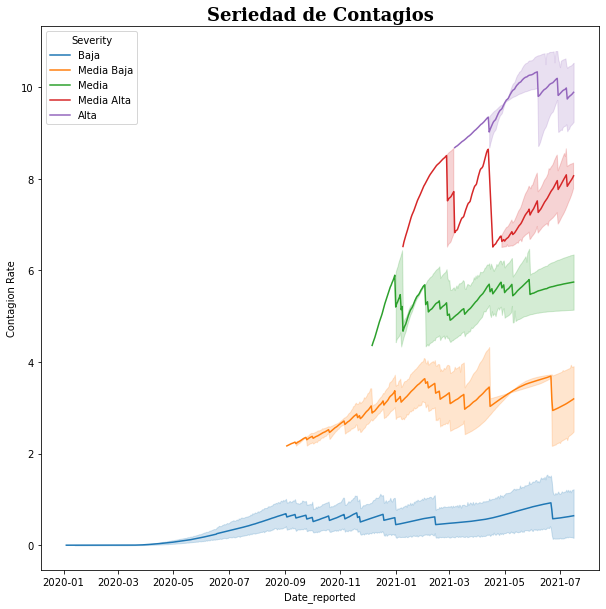

In [125]:
plt.figure(figsize = (10,10))
plt.title("Seriedad de Contagios", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
sns.lineplot(x = 'Date_reported', y = 'Contagion Rate',hue="Severity",data = CovidDF)

### Dataset Original del Bitcoin

In [33]:
btc = pd.read_csv("BTC-USD.csv")
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
1,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
2,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
3,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,2.327626e+10
4,2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,2.876729e+10
...,...,...,...,...,...,...,...
556,2021-07-12,34254.015625,34592.156250,32697.308594,33155.847656,33155.847656,2.432150e+10
557,2021-07-13,33125.468750,33327.101563,32261.419922,32702.025391,32702.025391,1.912086e+10
558,2021-07-14,32723.845703,33061.398438,31639.125000,32822.347656,32822.347656,2.137653e+10
559,2021-07-15,32827.875000,33159.640625,31175.708984,31780.730469,31780.730469,2.130052e+10


### Obtención de metrica Average, normalización de volume y separación a Date, average y Volume

In [1]:
Bitcoin = pd.read_csv("BTC-USD.csv")
Bitcoin["Average"] = Bitcoin["High"]/2 + Bitcoin["Low"]/2
Bitcoin["Average"] = Bitcoin["Average"].round(2)
Bitcoin["Date"] = pd.to_datetime(Bitcoin["Date"])
Bitcoin['Volume'] = Bitcoin['Volume']/1000000000
bit = Bitcoin[["Date","Average","Volume"]]
#bit1 = Bitcoin.loc[Bitcoin["Date"]<"01/01/2021"]
#bit2 = Bitcoin.loc[Bitcoin["Date"]>"31/12/2020"]
#bit2
#bit1
#bit.info()

NameError: name 'pd' is not defined

### Encontrando los valores nulos del dataset de Bitcoin

In [36]:
bit.isnull().sum()

Date       0
Average    4
Volume     4
dtype: int64

In [37]:
Bitcoin.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
Average      4
dtype: int64

In [38]:
bit[bit.isnull()["Average"]]

,Date,Average,Volume
105,2020-04-17,NaN,NaN
280,2020-10-09,NaN,NaN
283,2020-10-12,NaN,NaN
284,2020-10-13,NaN,NaN


### Tratamiento de valores nulos, se uso el promedio de los vecinos

In [39]:
bit.loc[105,"Average"] = bit.loc[104,"Average"]*0.5 + bit.loc[106,"Average"]*0.5
bit.loc[105,"Volume"] = bit.loc[104,"Volume"]*0.5 + bit.loc[106,"Volume"]*0.5
bit.loc[280,"Average"] = bit.loc[279,"Average"]*0.5 + bit.loc[281,"Average"]*0.5
bit.loc[280,"Volume"] = bit.loc[279,"Volume"]*0.5 + bit.loc[281,"Volume"]*0.5
bit.loc[283,"Average"] = bit.loc[282,"Average"]*0.5 + bit.loc[285,"Average"]*0.5
bit.loc[283,"Volume"] = bit.loc[282,"Volume"]*0.5 + bit.loc[285,"Volume"]*0.5
bit.loc[284,"Average"] = bit.loc[283,"Average"]*0.5 + bit.loc[285,"Average"]*0.5
bit.loc[284,"Volume"] = bit.loc[283,"Volume"]*0.5 + bit.loc[285,"Volume"]*0.5

C:\Users\Jimmy Leon\anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [112]:
max = bit["Volume"].idxmax()
bit.loc[max]


Date       2021-02-26 00:00:00
Average           46412.810000
Volume              350.967941
Name: 420, dtype: object

In [ ]:
min = bit["Volume"].idxmin()
bit.loc[min]

In [ ]:
#bit1 = Bitcoin.loc[Bitcoin["Date"]<"01/01/2021"]
#bit2 = Bitcoin.loc[Bitcoin["Date"]>"31/12/2020"]

### Grafica de Average con respecto al tiempo

<AxesSubplot:xlabel='Date', ylabel='Average'>

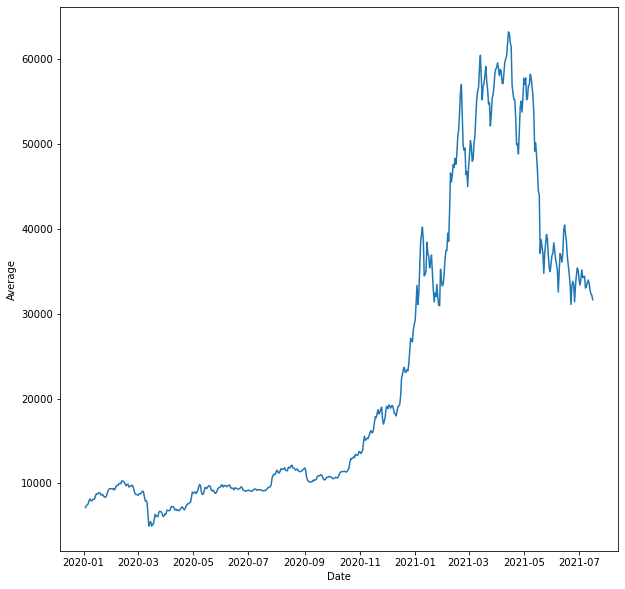

In [111]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Date', y = 'Average',data = Bitcoin)

### Encontrando los máximos y minimos del Average

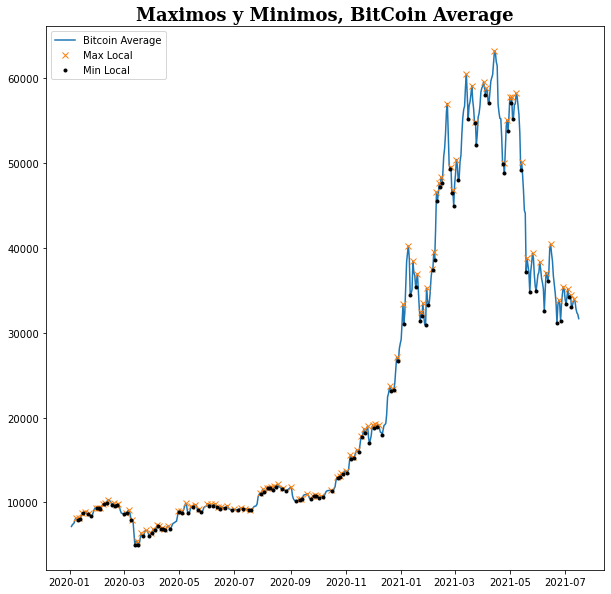

In [130]:
bit1 = bit.loc[bit["Date"]<"30/06/2020"]

bit2 = bit1.loc[bit1["Date"]>"31/03/2020"]

y = bit["Average"]
x = bit["Date"]
peaks, _ = find_peaks(y)
min_, _ = find_peaks(-y)


plt.figure(figsize = (10,10))
plt.title("Maximos y Minimos, BitCoin Average", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.plot(x, y,label='Bitcoin Average')
plt.plot(x.loc[peaks], y[peaks], "x",label='Max Local')
plt.plot(x.loc[min_], y[min_], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()


### Econtrando y graficando maximos y minimos del Average del bitcoin pero  desde 2020/01/01 hasta 2020/06/30

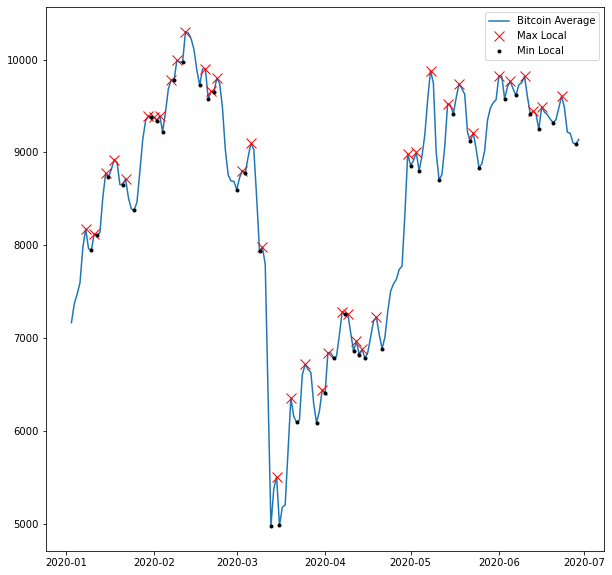

In [131]:
bit1 = bit.loc[bit["Date"]<"30/06/2020"]
y = bit1["Average"]
x = bit1["Date"]
max_, _ = find_peaks(y)
min_, _ = find_peaks(-y)

# this way the x-axis corresponds to the index of x
plt.figure(figsize = (10,10))
plt.plot(x, y,label='Bitcoin Average')
plt.plot(x.loc[max_], y[max_], "x",c="red",markersize=10,label='Max Local')
plt.plot(x.loc[min_], y[min_], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()




### Econtrando y graficando maximos y minimos del Volume del bitcoin pero  desde 2020/01/01 hasta 2020/06/30

In [ ]:
y2 = bit1["Volume"]
x2 = bit1["Date"]
max_2, _ = find_peaks(y)
min_2, _ = find_peaks(-y)
plt.figure(figsize = (10,10))
plt.plot(x2, y2,label='Bitcoin Volume')
plt.plot(x2.loc[max_2], y2[max_2], "x",c="red",markersize=10,label='Max Local')
plt.plot(x2.loc[min_2], y2[min_2], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()

In [ ]:
peaks, _ = find_peaks(y)
x = bit["Date"]
new = x.loc[peaks]
new

### Agrupación por fecha y suma de las métricas de todos los paises del Covid

In [103]:
Paises = CovidDF[["Date_reported","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths","Contagion Rate Global"]].groupby("Date_reported").sum()
Paises.reset_index(inplace=True)
#paises1
#paises2
#Paises
PaisesCovid

,Date_reported,Contagion Rate
0,2020-01-04,6.943008e-08
1,2020-01-05,6.943008e-08
2,2020-01-06,2.777203e-07
3,2020-01-07,2.777203e-07
4,2020-01-08,2.777203e-07
...,...,...
555,2021-07-12,4.657091e+00
556,2021-07-13,4.667813e+00
557,2021-07-14,4.679184e+00
558,2021-07-15,4.692792e+00


### Grafica de Contagion Rate Global con respecto al tiempo

<AxesSubplot:xlabel='Date_reported', ylabel='Contagion Rate Global'>

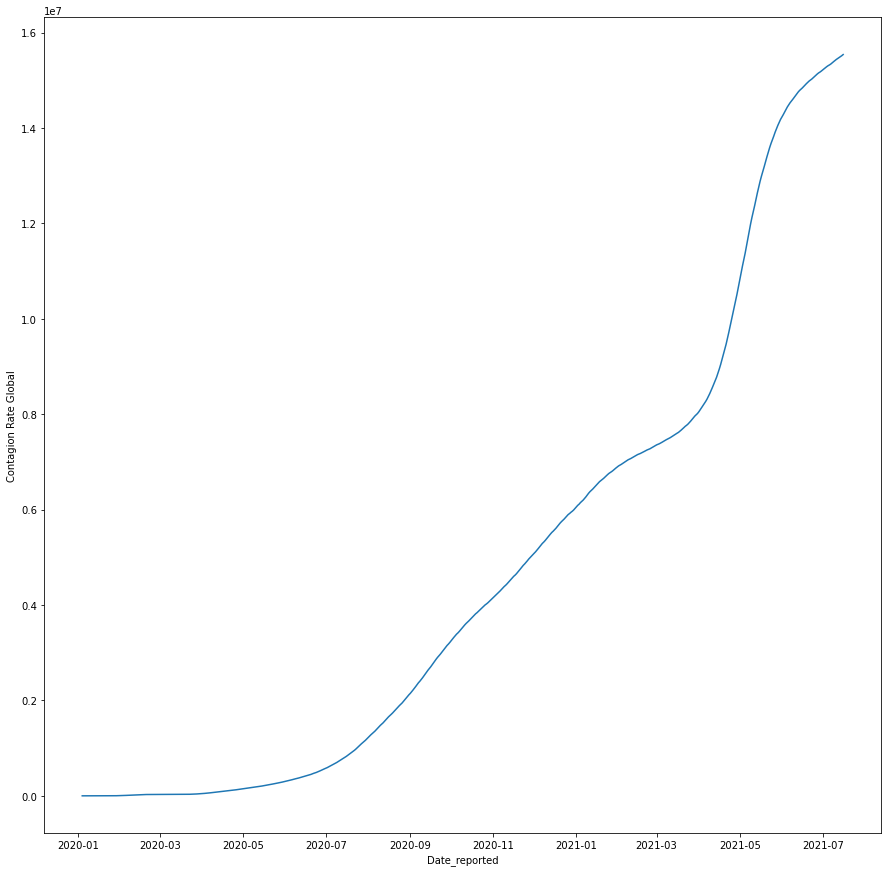

In [104]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'Contagion Rate Global',data = Paises)

### Grafica de Cumulative Cases con respecto al tiempo de todos los paises acumulado

<AxesSubplot:xlabel='Date_reported', ylabel='Cumulative_cases'>

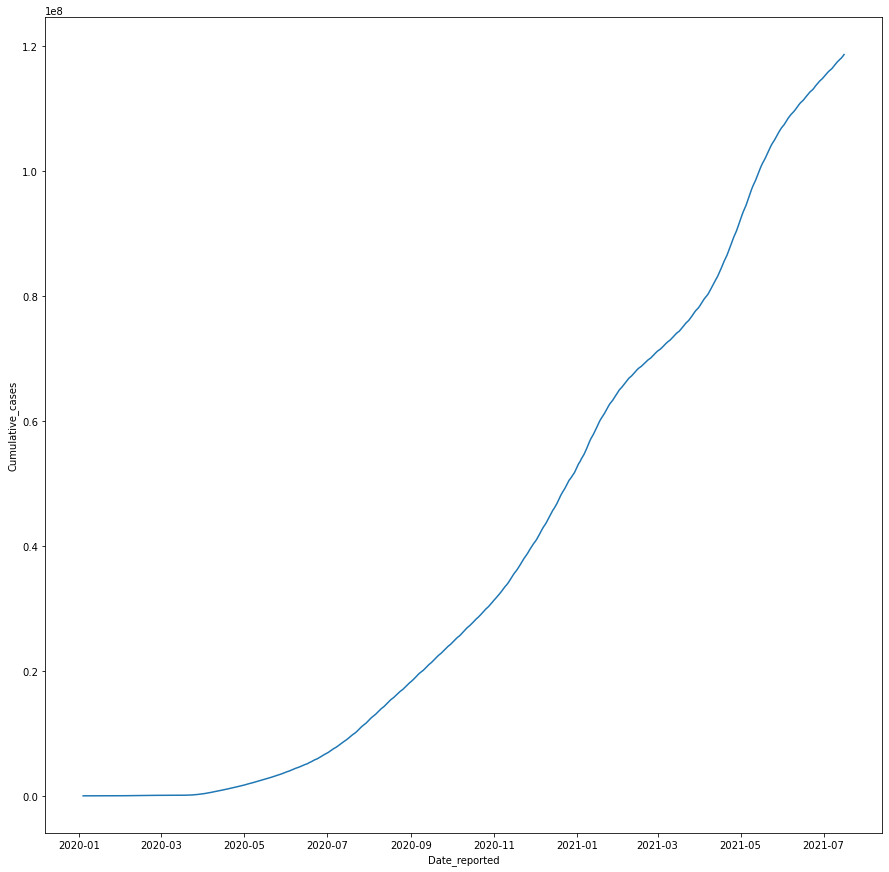

In [105]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'Cumulative_cases',data = Paises)

### Gráfica de Nuevos contagios diarios con respecto al tiempo de todos los paises acumulado

<AxesSubplot:title={'center':'Nuevos Contagios Diarios'}, xlabel='Date_reported', ylabel='New_cases'>

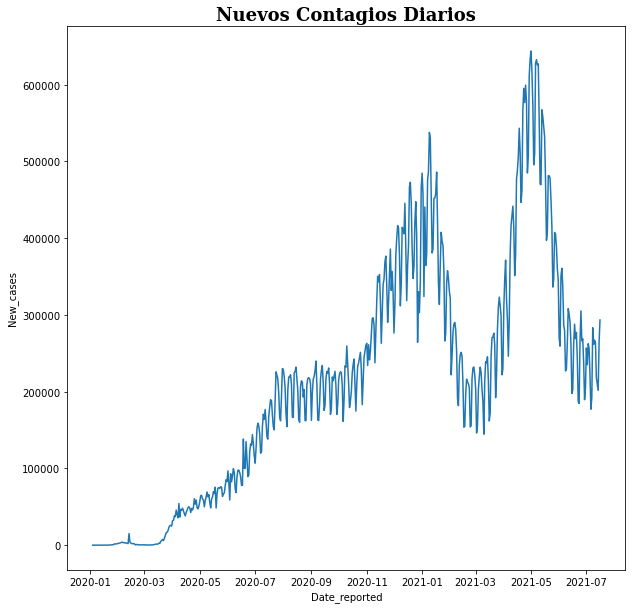

In [133]:
plt.figure(figsize = (10,10))
plt.title("Nuevos Contagios Diarios", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = Paises)

### Subdatset del Covid de solo Estados Unidos 

In [108]:
United_State = df3.query("Country=='United States of America'")
max = United_State["New_cases"].idxmax()
United_State.loc[max]
Rusia = df3.query("Country=='United States of America'")

### Grafica del precio del Bitcoin vs Nuevos casos del Covid solo de USA

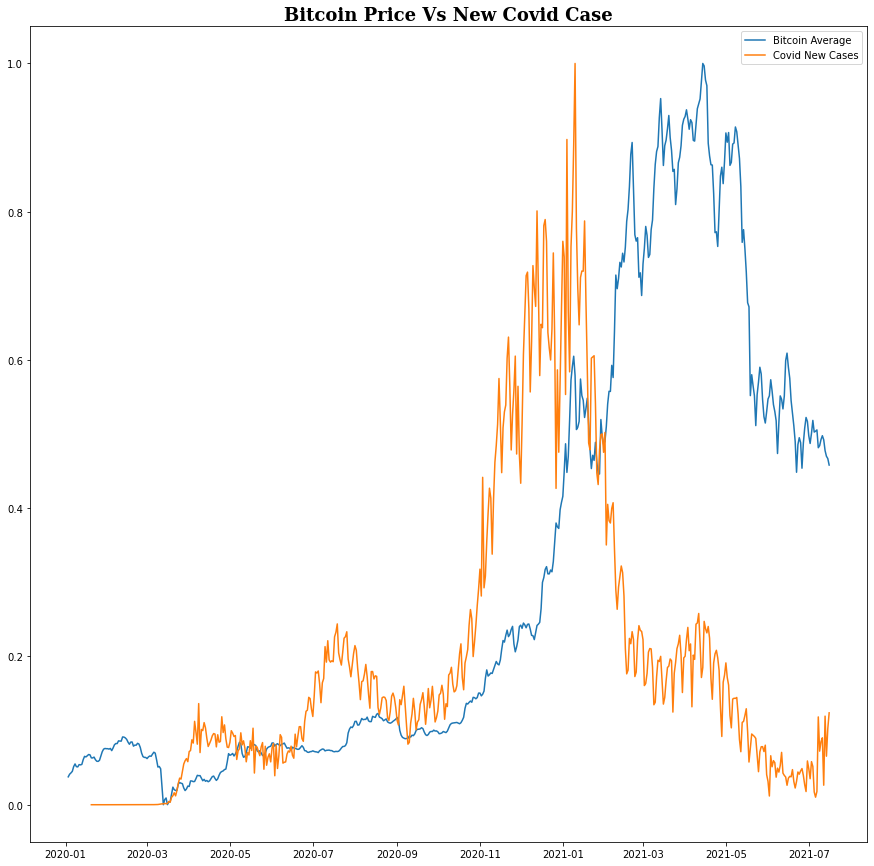

In [134]:
plt.figure(figsize = (15,15))
plt.title("Bitcoin Price Vs New Covid Case", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

bitc=minmax_norm_Bitcoin(bit)
US2 =minmax_norm_Pais(United_State)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = US2
x = United_State["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()
#sns.lineplot(x = 'Date_reported', y = 'New_cases',data = United_State)

### Tratamiento de un outlier, utilizando el promedio de su vecinos

In [113]:
max_i = bit["Volume"].idxmax()
max_i
bit.loc[420,"Volume"] = bit.loc[419,"Volume"]*0.5 + bit.loc[421,"Volume"]*0.5

C:\Users\Jimmy Leon\anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Grafico del volumen de transacciones vs Precio del bitcoin vs nuevos casos del Covid de los 20 paises

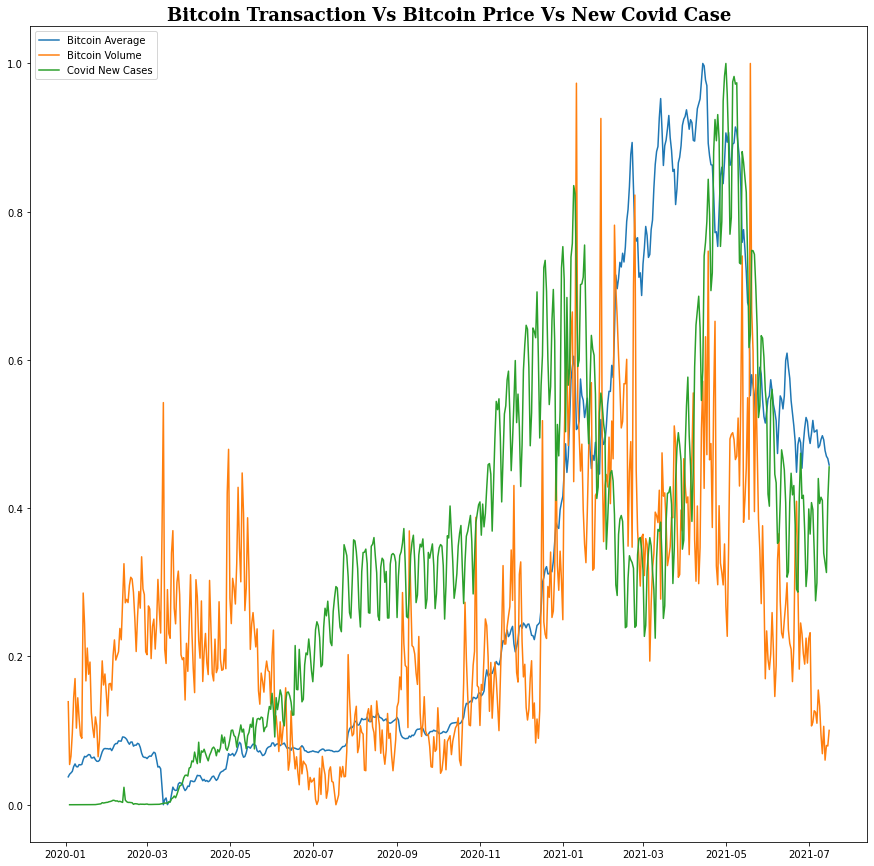

In [138]:
plt.figure(figsize = (15,15))
plt.title("Bitcoin Transaction Vs Bitcoin Price Vs New Covid Case", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

def minmax_norm_Bitcoin2(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(bit)
bitc2=minmax_norm_Bitcoin2(bit)
US2 =minmax_norm_Pais(Paises)

y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = bitc2
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

### Grafico del Precio del Bitcoin vs Nuevos casos del Covid de los 20 paises

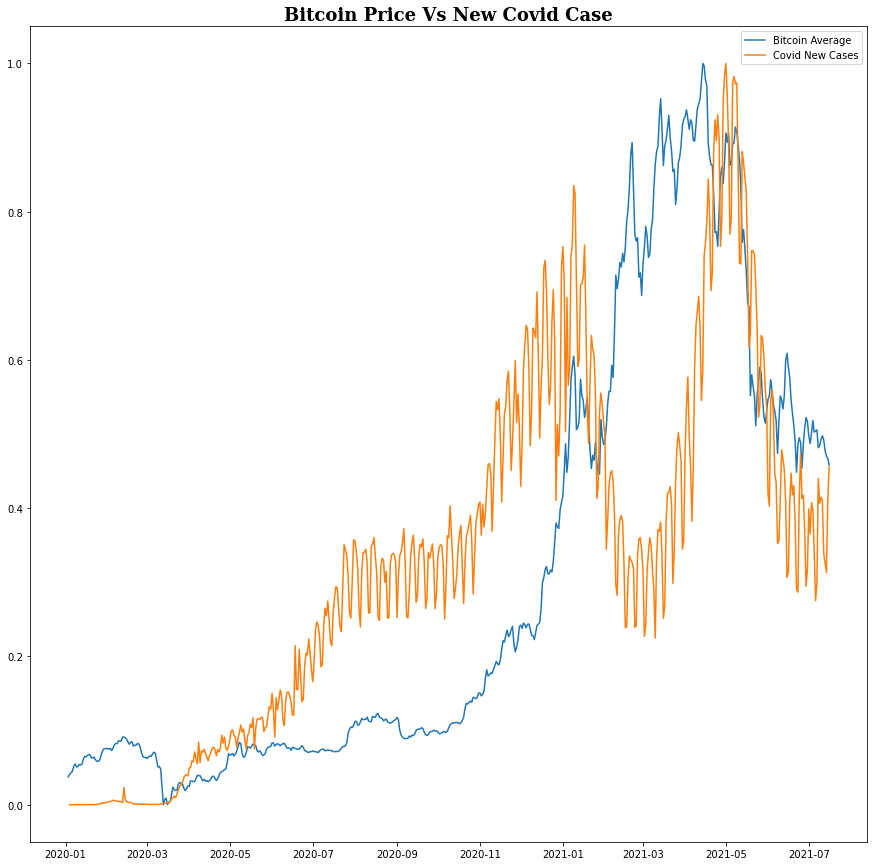

In [137]:
plt.figure(figsize = (15,15))
plt.title("Bitcoin Price Vs New Covid Case", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

bitc=minmax_norm_Bitcoin(bit)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

### Grafico del volumen de las transacciones vs Nuevos casos del Covid de los 20 paises

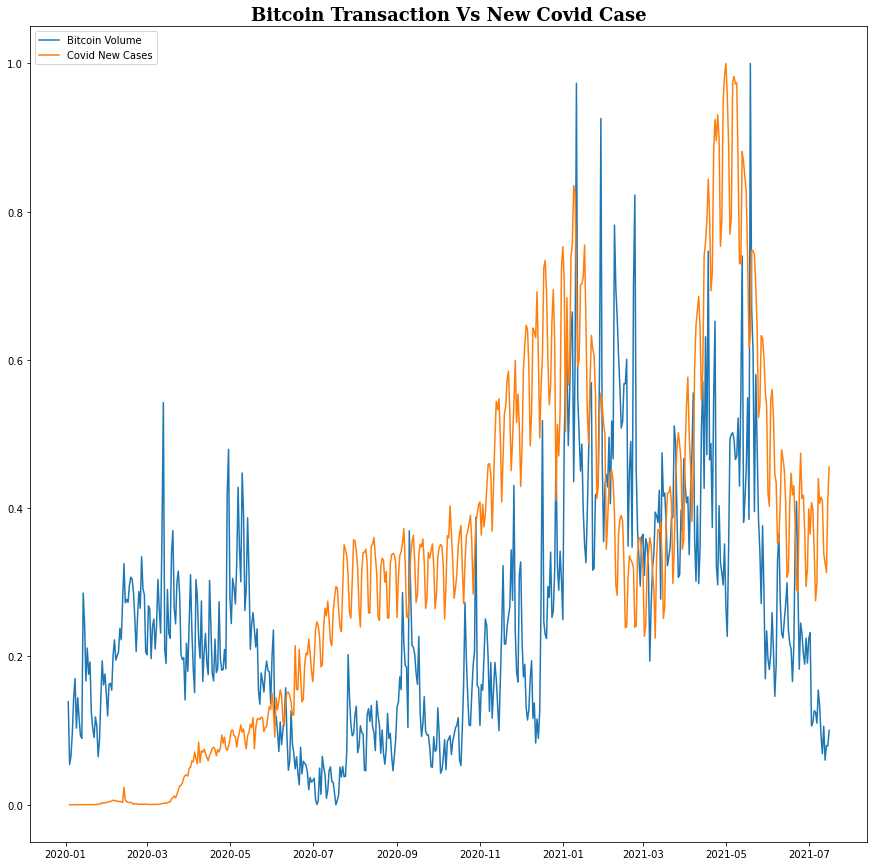

In [136]:
plt.figure(figsize = (15,15))
plt.title("Bitcoin Transaction Vs New Covid Case", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(bit)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

In [ ]:
max_i = bit["Volume"].idxmax()
bit.loc[max_i]

In [ ]:
max_i = bit["Volume"].idxmax()
Bitcoin2=bit.loc[bit.index!=max_i]

plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(Bitcoin2)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin2["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

In [ ]:

max_i = bit["Volume"].idxmax()
Bitcoin2=bit.loc[bit.index!=max_i]

plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["Cumulative_cases"] - df["Cumulative_cases"].min()) / ( df["Cumulative_cases"].max() - df["Cumulative_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(Bitcoin2)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin2["Date"]
plt.plot(x, y)
y = US2
x = Paises["Date_reported"]
plt.plot(x, y)

In [ ]:
def add_weekday(row):
    if(row["Date"].dayofweek<5):
        return 0
    else:
        return 1
Bitcoin["isWeekEnd"] = Bitcoin.apply(add_weekday,axis=1)   
Bitcoin

In [ ]:
max_i = Bitcoin["Volume"].idxmax()
Bitcoin2=Bitcoin.loc[Bitcoin.index!=max_i]

plt.figure(figsize = (3,5))

sns.boxplot(y="Volume",data = Bitcoin)

In [ ]:
df3


#sns.boxplot(x="Country",y="New_cases",data = df3)
sns.catplot(y="New_cases",data = df3, kind="box", col="Country", col_wrap=2)

In [ ]:
plt.figure(figsize = (15,15))
sns.lineplot(x= "Date_reported",y = 'New_cases',data = df3)

In [ ]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = Paises)

In [ ]:
'''
1.- ¿Cual es la realacion que existe entre la pandemia del Covid y la bolsa de valores del Bitcoin (con respecto al volumen)?
2.- ¿Cual es la realacion que existe entre la pandemia del Covid y la bolsa de valores del Bitcoin (con respecto al valor)?
3.- ¿Cuales son las caracteriscas mas influyentes para esta correlacion?
'''

In [ ]:
df_index = df3.index

In [ ]:
df_index #aqui solo retorna el objeto el valor inicial y el fin de los indices del dataframe

In [ ]:
df3.columns

In [ ]:
df_index.values #convertir en un array los valores de los indices

In [ ]:
df3.values #toma los valores del dataframe pero no toma los indices ni las columnas y lo transforma en una matriz tipo numpy

In [ ]:
df3.dtypes #tipo de clase es cada columna

In [ ]:
df3.info() #info mas detallada del dataframe

In [ ]:
df3.describe() #estadisticas del dataframe